In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def FHN(self, X):
        x1, y1, x2, y2 = X
        return [x1*(a-x1)*(x1-1) - y1 + k*(x2-x1),
                b1*x1 - c*y1,
                x2*(a-x2)*(x2-1) - y2 + k*(x1-x2),
                b2*x2 - c*y2
               ]

In [3]:
a = -0.025794
c = 0.02
b1 = 0.0135
b2 = 0.0065
k = 0.129
sigma = 1
alpha = 0.35
eps = 1
beta = 10e-8
q=1.6

In [4]:
sol = solve_ivp(FHN, [0, 250000], [-0.1, 0.1, -0.1, -0.1], 
                t_eval=np.array(range(0, 250000, 2 * 0.)), rtol = 1e-11, atol = 1e-11, dense_output=True)

In [4]:
sol = solve_ivp(FHN, [0, 25000], [-0.1, 0.1, -0.1, -0.1], 
                t_eval=np.array(range(0, 25000, 2)), rtol = 1e-11, atol = 1e-11, dense_output=True)

In [9]:
import nolds

In [10]:
nolds.lyap_r(sol.y[0], min_tsep=3125)

0.013575303644165817

In [23]:
from jitcode import jitcode_lyap, y

In [24]:
f = [y(0)*(a-y(0))*(y(0)-1) - y(1) + k*(y(2)-y(0)),
                b1*y(0) - c*y(1),
                y(2)*(a-y(2))*(y(2)-1) - y(4) + k*(y(0)-y(2)),
                b2*y(2) - c*y(4)
               ]

In [26]:
f

[y(0)*(-1 + y(0))*(-0.025794 - y(0)) + 0.129*(-y(0) + y(2)) - y(1),
 0.0135*y(0) - 0.02*y(1),
 y(2)*(-1 + y(2))*(-0.025794 - y(2)) + 0.129*(y(0) - y(2)) - y(4),
 0.0065*y(2) - 0.02*y(4)]

In [34]:
initial_state = np.array([-0.1, 0.1, -0.1, -0.1])

n = len(f)
ODE = jitcode_lyap(f, n_lyap=n)
ODE.set_integrator("dopri5")
ODE.set_initial_value(initial_state,0.0)

times = range(10,100000,10)
lyaps = []
for time in times:
    lyaps.append(ODE.integrate(time)[1])

# converting to NumPy array for easier handling
lyaps = np.vstack(lyaps)

for i in range(n):
    lyap = np.average(lyaps[1000:,i])
    stderr = sem(lyaps[1000:,i]) # Note that this only an estimate
    print("%i. Lyapunov exponent: % .4f ± %.4f" % (i+1,lyap,stderr))

Generating, compiling, and loading C code.
generated C code for f
generated symbolic Jacobian


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



generated C code for Jacobian
Traceback (most recent call last):
  File "D:\miniconda\envs\torchenv\lib\distutils\core.py", line 148, in setup
    dist.run_commands()
  File "D:\miniconda\envs\torchenv\lib\distutils\dist.py", line 966, in run_commands
    self.run_command(cmd)
  File "D:\miniconda\envs\torchenv\lib\distutils\dist.py", line 985, in run_command
    cmd_obj.run()
  File "D:\miniconda\envs\torchenv\lib\site-packages\setuptools\command\build_ext.py", line 79, in run
    _build_ext.run(self)
  File "D:\miniconda\envs\torchenv\lib\distutils\command\build_ext.py", line 340, in run
    self.build_extensions()
  File "D:\miniconda\envs\torchenv\lib\site-packages\jitcxde_common\_jitcxde.py", line 304, in build_extensions
    build_ext.build_extensions(self)
  File "D:\miniconda\envs\torchenv\lib\distutils\command\build_ext.py", line 449, in build_extensions
    self._build_extensions_serial()
  File "D:\miniconda\envs\torchenv\lib\distutils\command\build_ext.py", line 474, in _bu

TypeError: object of type 'NoneType' has no len()

In [11]:
nolds.lyap_e(sol.y[0], min_tsep=3125)

array([ 0.14850736,  0.0472261 , -0.11623544, -0.21915923], dtype=float32)

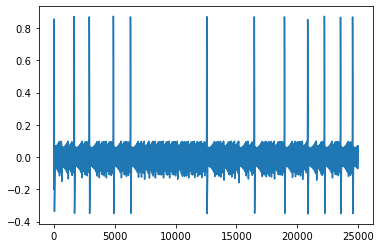

In [7]:
plt.plot(sol.t, sol.y[0])

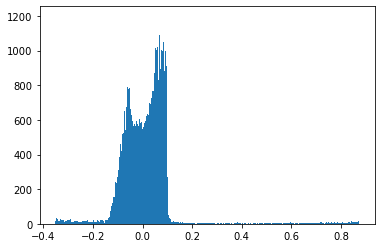

In [12]:
plt.hist(sol.y[0], 1000)
plt.show()

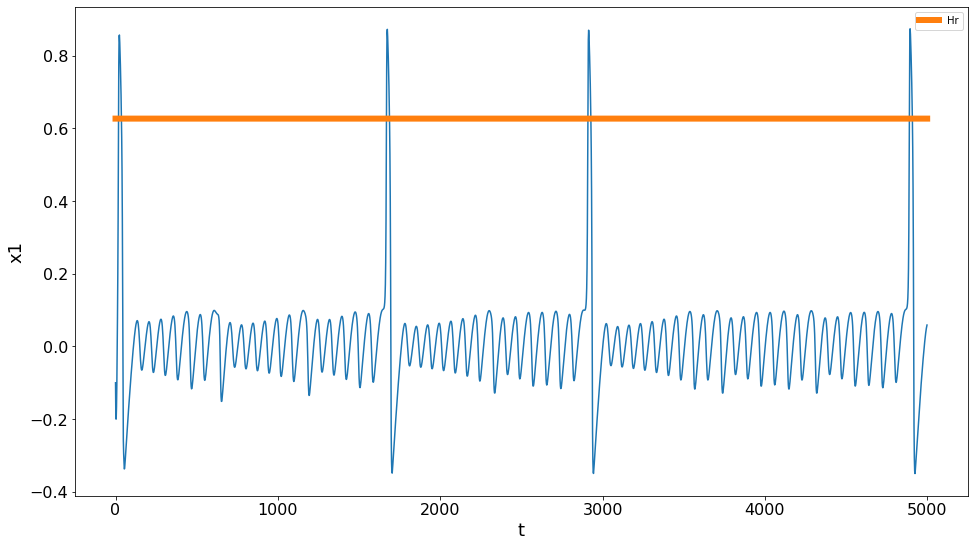

In [10]:
csfont = {'fontsize': 18}
plt.figure(figsize=(16, 9))
plt.tick_params(axis='both', which='major', labelsize=16)

plt.xlabel('t', **csfont)
plt.ylabel('x1', **csfont)
plt.plot(sol.t[:2500], sol.y[0][:2500])
plt.plot(list(range(5000)), [mean + 6*std for _ in range(5000)], linewidth = 6, label = "Hr")
plt.legend()

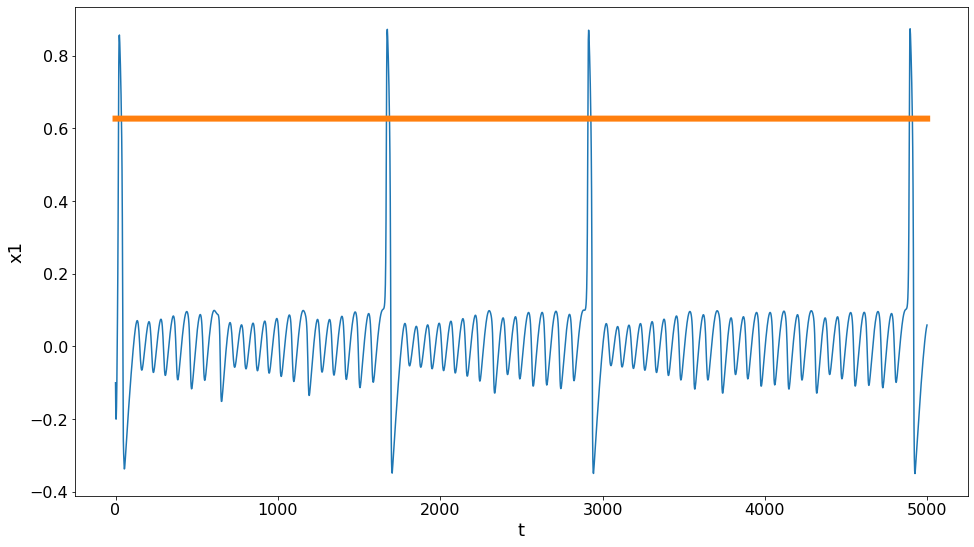

In [68]:
csfont = {'fontsize': 18}
plt.figure(figsize=(16, 9))
plt.tick_params(axis='both', which='major', labelsize=16)

plt.xlabel('t', **csfont)
plt.ylabel('x1', **csfont)
plt.plot(sol.t[:2500], sol.y[0][:2500])
plt.plot(list(range(5000)), [mean + 6*std for _ in range(5000)], linewidth = 6, label = "Hr")

In [6]:
import numpy as np
import pandas as pd
import torchvision
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [7]:
model = nn.Sequential(
          nn.Linear(1, 100),
          nn.Sigmoid(),
          nn.Linear(100, 1)
        )
model.to('cuda')

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [6]:
data = sol.y[0]

In [7]:
data.shape

(12500,)

In [8]:
train = data[:10000]
test =  data[10000:]

mean = train.mean()
std = train.std()
#sigmastest = np.abs(test - mean)
train_norm = (train - mean)/std
test_norm = (test - mean)/std

In [11]:
train = torch.FloatTensor(train).view(-1 ,1)
test = torch.FloatTensor(test).view(-1 ,1)

In [12]:
X = train[:-1]
Y = train[1:]
X.size() == Y.size()

True

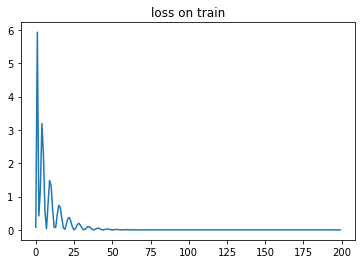

0.0003716280625667423


In [13]:
epochs = 200
learning_rate = 0.05
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
losses = []
model.train()
for i in range(epochs):
    epoch_loss = []
    optimizer.zero_grad()
    
    y_pred = model(X.to('cuda'))

    single_loss = nn.MSELoss()(y_pred, Y.to('cuda'))
    single_loss.backward()
    optimizer.step()
    epoch_loss.append(single_loss.item())

        
    clear_output(True)
    losses.append(np.mean(epoch_loss))
    plt.title("loss on train")
    plt.plot(losses)
    plt.show()
    print(losses[-1])

In [14]:
model.to('cpu')
y_test = model(test[:-1])

In [50]:
y_test.detach().numpy() - test[1:]

array([[ 0.03027954,  0.05919872,  0.08202327, ..., -0.06506964,
        -0.07021692, -0.07454292],
       [-0.00048666,  0.02843251,  0.05125706, ..., -0.09583584,
        -0.10098312, -0.10530913],
       [-0.02990949, -0.00099032,  0.02183424, ..., -0.12525867,
        -0.13040595, -0.13473195],
       ...,
       [ 0.09066237,  0.11958154,  0.1424061 , ..., -0.00468681,
        -0.00983409, -0.01416009],
       [ 0.09662176,  0.12554093,  0.14836549, ...,  0.00127258,
        -0.0038747 , -0.0082007 ],
       [ 0.1018587 ,  0.13077787,  0.15360243, ...,  0.00650952,
         0.00136224, -0.00296376]])

In [15]:
(((y_test.detach().numpy() - test[1:].numpy())**2).mean())**0.5

0.02435508638057334

In [16]:
ffnn = y_test.detach().numpy()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg 

Computing spectral radius...
done.
MSE = 9.972778714317691e-05


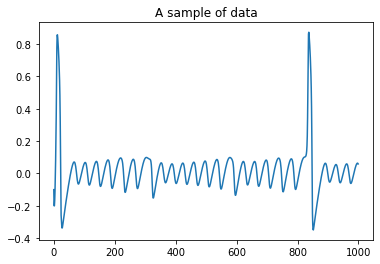

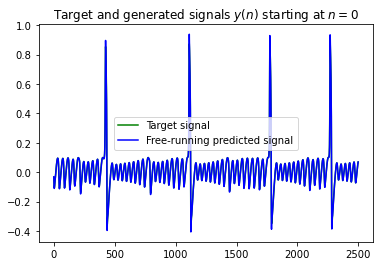

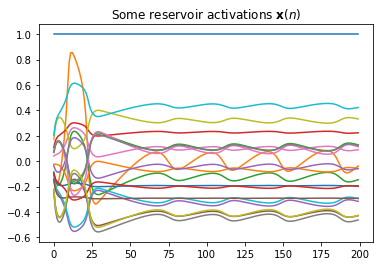

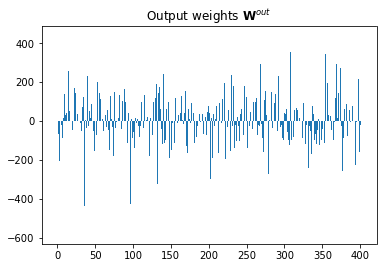

In [18]:


# load the data
trainLen = 10000
testLen = 2499
initLen = 0

# plot some of it
plt.figure(10).clear()
plt.plot(data[:1000])
plt.title('A sample of data')

# generate the ESN reservoir
inSize = outSize = 1
resSize = 400
a = 0.5 # leaking rate
np.random.seed(42)
Win = (np.random.rand(resSize,1+inSize) - 0.5) * 1
W = np.random.rand(resSize,resSize) - 0.5 
# normalizing and setting spectral radius (correct, slow):
print('Computing spectral radius...')
rhoW = max(abs(linalg.eig(W)[0]))
print('done.')
W *= 0.001 / rhoW

# allocated memory for the design (collected states) matrix
X = np.zeros((1+inSize+resSize,trainLen-initLen))
# set the corresponding target matrix directly
Yt = data[None,initLen+1:trainLen+1] 

# run the reservoir with the data and collect X
x = np.zeros((resSize,1))
for t in range(trainLen):
    u = data[t]
    x = (1-a)*x + a*np.tanh(np.dot(Win, np.vstack((1,u))) + np.dot( W, x ) )
    if t >= initLen:
        X[:,t-initLen] = np.vstack((1,u,x))[:,0]
    
# train the output by ridge regression
reg = 1e-8  # regularization coefficient
# direct equations from texts:
#X_T = X.T
#Wout = np.dot( np.dot(Yt,X_T), linalg.inv( np.dot(X,X_T) + \
#    reg*np.eye(1+inSize+resSize) ) )
# using scipy.linalg.solve:
Wout = linalg.solve( np.dot(X,X.T) + reg*np.eye(1+inSize+resSize), 
    np.dot(X,Yt.T) ).T

# run the trained ESN in a generative mode. no need to initialize here, 
# because x is initialized with training data and we continue from there.
Y = np.zeros((outSize,testLen))
u = data[trainLen]
for t in range(testLen):
    x = (1-a)*x + a*np.tanh( np.dot( Win, np.vstack((1,u)) ) + np.dot( W, x ) )
    y = np.dot( Wout, np.vstack((1,u,x)) )
    Y[:,t] = y
    # generative mode:
    #u = y
    ## this would be a predictive mode:
    u = data[trainLen+t+1] 

# compute MSE for the first errorLen time steps
errorLen = 500
mse = sum( np.square( data[trainLen+1:trainLen+errorLen+1] - 
    Y[0,0:errorLen] ) ) / errorLen
print('MSE = ' + str( mse ))
    
# plot some signals
plt.figure(1).clear()
plt.plot( data[trainLen+1:trainLen+testLen+1], 'g' )
plt.plot( Y.T, 'b' )
plt.title('Target and generated signals $y(n)$ starting at $n=0$')
plt.legend(['Target signal', 'Free-running predicted signal'])

plt.figure(2).clear()
plt.plot( X[0:20,0:200].T )
plt.title(r'Some reservoir activations $\mathbf{x}(n)$')

plt.figure(3).clear()
plt.bar( np.arange(1+inSize+resSize), Wout[0].T )
plt.title(r'Output weights $\mathbf{W}^{out}$')

plt.show()

In [19]:
Y.shape

(1, 2499)

In [22]:
np.array(Y) - test[1:]

array([[ 0.00381404,  0.00016776, -0.00377513, ..., -0.00103534,
        -0.00093189, -0.0007964 ]])

In [23]:
(((np.array(Y) - test[1:])**2).mean())**0.5

0.009175219485768727

In [24]:
rc = Y

In [1]:
import numpy as np
import pandas as pd
import torchvision
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from IPython.display import clear_output
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=32, num_layers=2, output_size=1, dropout=0.2):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.linear_1 = nn.Linear(input_size, hidden_layer_size)
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(hidden_layer_size, hidden_size=self.hidden_layer_size, num_layers=num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.linear_2 = nn.Linear(num_layers*hidden_layer_size, output_size)
        
        self.init_weights()

    def init_weights(self):
        for name, param in self.lstm.named_parameters():
            if 'bias' in name:
                 nn.init.constant_(param, 0.0)
            elif 'weight_ih' in name:
                 nn.init.kaiming_normal_(param)
            elif 'weight_hh' in name:
                 nn.init.orthogonal_(param)

    def forward(self, x):
        batchsize = x.shape[0]

        # layer 1
        x = self.linear_1(x)
        x = self.relu(x)
        
        # LSTM layer
        lstm_out, (h_n, c_n) = self.lstm(x)

        # reshape output from hidden cell into [batch, features] for `linear_2`
        x = h_n.permute(1, 0, 2).reshape(batchsize, -1) 
        
        # layer 2
        x = self.dropout(x)
        predictions = self.linear_2(x)
        return predictions[:,-1]

In [18]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size).to('cuda'),
                            torch.zeros(1,1,self.hidden_layer_size).to('cuda'))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [9]:
train_norm = torch.FloatTensor(train_norm).view(-1)
test_norm = torch.FloatTensor(test_norm).view(-1)

In [10]:
train_window = 20

def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [11]:
train_inout_seq = create_inout_sequences(train_norm, train_window)
test_inout_seq = create_inout_sequences(test_norm, train_window)

In [12]:
train_dataloader = DataLoader(train_inout_seq, batch_size=64, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_inout_seq, batch_size=64, shuffle=True, drop_last=True)

In [19]:
model = LSTM()
model = model.to('cuda')

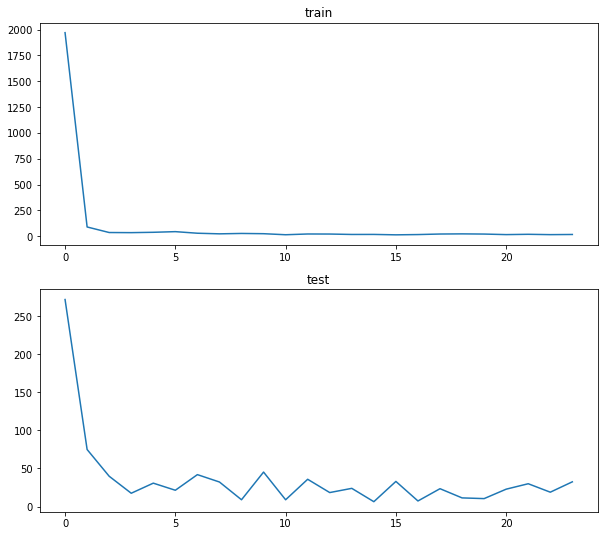

Epoch[24/200] | loss train:16.562625, test:32.423255 | lr:0.001000


KeyboardInterrupt: 

In [21]:
def run_epoch(train_inout_seq, is_training=False):
    epoch_loss = 0

    if is_training:
        model.train()
    else:
        model.eval()

    for seq, label in train_inout_seq:
        if is_training:
            optimizer.zero_grad()
            
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size).to('cuda'),
                        torch.zeros(1, 1, model.hidden_layer_size).to('cuda'))
        y_pred = model(seq.to('cuda'))

        
        loss = criterion(y_pred, label.to('cuda'))

        if is_training:
            loss.backward()
            optimizer.step()

        epoch_loss += loss.detach().item() 

    lr = scheduler.get_last_lr()[0]

    return epoch_loss, lr

# define optimizer, scheduler and loss function
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=40, gamma=0.1)

losses_train = []
losses_test = []
# begin training
for epoch in range(200):
    loss_train, lr_train = run_epoch(train_inout_seq, is_training=True)
    loss_val, lr_val = run_epoch(test_inout_seq)
    scheduler.step()
    losses_train.append(loss_train)
    losses_test.append(loss_val)
    
    clear_output(True)
    fig = plt.figure(figsize=(10, 9))
    
    ax_1 = fig.add_subplot(2, 1, 1)
    ax_2 = fig.add_subplot(2, 1, 2)
    ax_1.set_title('train')
    ax_1.plot(losses_train)
    ax_2.set_title('test')
    ax_2.plot(losses_test)
    plt.show()
    
    print('Epoch[{}/{}] | loss train:{:.6f}, test:{:.6f} | lr:{:.6f}'
              .format(epoch+1, 200, loss_train, loss_val, lr_train))

In [13]:
model = LSTMModel(input_size=1, hidden_layer_size=100, num_layers=2, output_size=1, dropout=0.2)
model = model.to('cuda')

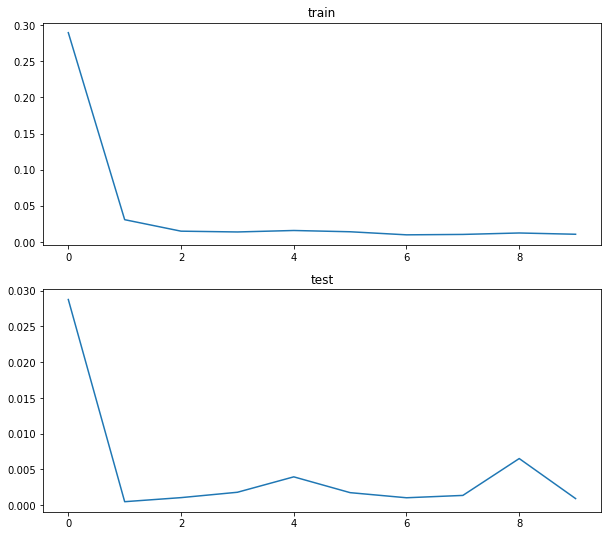

Epoch[10/200] | loss train:0.010641, test:0.000919 | lr:0.001000


In [14]:
def run_epoch(dataloader, is_training=False):
    epoch_loss = 0

    if is_training:
        model.train()
    else:
        model.eval()

    for idx, (x, y) in enumerate(dataloader):
        if is_training:
            optimizer.zero_grad()

        batchsize = x.shape[0]

        x = torch.reshape(x, (64, 20, 1)).to('cuda')
        y = y.view(-1).to('cuda')

        out = model(x)
        loss = criterion(out.contiguous(), y.contiguous())

        if is_training:
            loss.backward()
            optimizer.step()

        epoch_loss += (loss.detach().item() / batchsize)

    lr = scheduler.get_last_lr()[0]

    return epoch_loss, lr

# define optimizer, scheduler and loss function
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=40, gamma=0.1)

losses_train = []
losses_test = []
# begin training
for epoch in range(10):
    loss_train, lr_train = run_epoch(train_dataloader, is_training=True)
    loss_val, lr_val = run_epoch(test_dataloader)
    scheduler.step()
    losses_train.append(loss_train)
    losses_test.append(loss_val)
    
    clear_output(True)
    fig = plt.figure(figsize=(10, 9))
    
    ax_1 = fig.add_subplot(2, 1, 1)
    ax_2 = fig.add_subplot(2, 1, 2)
    ax_1.set_title('train')
    ax_1.plot(losses_train)
    ax_2.set_title('test')
    ax_2.plot(losses_test)
    plt.show()
    
    print('Epoch[{}/{}] | loss train:{:.6f}, test:{:.6f} | lr:{:.6f}'
              .format(epoch+1, 200, loss_train, loss_val, lr_train))

In [22]:
model.eval()
model.to('cpu')
rmse = []
for k in range(1, 21):
    #k = 3
    last_k_step = test_norm[:k].tolist()
    prediction = []
    for seq, label in test_inout_seq:
        loop_steps = seq.tolist()
        #print(len(last_k_step))
        for j in range(k):
            model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                            torch.zeros(1, 1, model.hidden_layer_size))
            y_pred = model(torch.FloatTensor(loop_steps).view(-1))
            loop_steps.append(y_pred.detach()[0].item())
            loop_steps = loop_steps[1:]
            #print(len(loop_steps))
        clear_output(True)
        prediction.append(loop_steps[-1])
        #last_k_step.append(test_norm[i])
        #last_k_step = last_k_step[1:]
    if k == 1:
        r = (((np.array(prediction)*std+mean - np.array(test[20:]))**2).mean())**0.5
    else:
        r = (((np.array(prediction[:-k+1])*std+mean - np.array(test[20+k-1:]))**2).mean())**0.5
    rmse.append(r)

In [1]:
import matplotlib.ticker as ticker


Text(0.5, 0, 'prediction step')

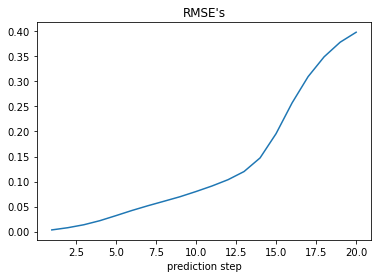

In [24]:
plt.plot(list(range(1, 21)),rmse)
plt.title("RMSE's")
plt.xlabel("prediction step")

In [39]:
train_dataloader = DataLoader(train_inout_seq, batch_size=64, shuffle=False, drop_last=True)
val_dataloader = DataLoader(test_inout_seq, batch_size=64, shuffle=False, drop_last=True)

model.eval()

# predict on the training data, to see how well the model managed to learn and memorize

predicted_train = np.array([])

for idx, (x, y) in enumerate(train_dataloader):
    x = torch.reshape(x, (64, 20, 1)).to('cuda')
    out = model(x)
    out = out.cpu().detach().numpy()
    predicted_train = np.concatenate((predicted_train, out))

# predict on the validation data, to see how the model does

predicted_val = np.array([])

for idx, (x, y) in enumerate(val_dataloader):
    x = torch.reshape(x, (64, 20, 1)).to('cuda')
    out = model(x)
    out = out.cpu().detach().numpy()
    predicted_val = np.concatenate((predicted_val, out))

In [40]:
predicted_val.shape

(2432,)

In [41]:
predicted_val*std+mean - np.array(test[20:2452])

array([-0.00452341, -0.00330834, -0.00196642, ..., -0.00484547,
       -0.00539078, -0.00509487])

In [42]:
(((predicted_val*std+mean - np.array(test[20:2452]))**2).mean())**0.5

0.007004394872700238

In [43]:
lstm = predicted_val*std+mean

In [44]:
rc = rc[:, 19:2451]

In [45]:
(((rc - np.array(test[20:2452]))**2).mean())**0.5

0.009296346297383885

In [46]:
ffnn = ffnn[19:2451]

In [47]:
lstm - np.array(test[20:2452])

array([-0.00452341, -0.00330834, -0.00196642, ..., -0.00484547,
       -0.00539078, -0.00509487])

In [52]:
(((ffnn - np.array(test[20:2452]))**2).mean())**0.5

0.024626496268577443

In [65]:
ffnn

array([[-1.2868166 ],
       [-0.840031  ],
       [-1.9238758 ],
       ...,
       [-1.8960335 ],
       [-1.0665245 ],
       [-0.69140357]], dtype=float32)

In [51]:
ffnn = ffnn.reshape(2432)
rc = rc.reshape(2432)

In [53]:
ansambl = 1/3*lstm + 1/3*rc + 1/3*ffnn

In [54]:
(((ansambl - np.array(test[20:2452]))**2).mean())**0.5

0.010994072298746197

In [55]:
model = nn.Sequential(
          nn.Linear(3, 1),
        )
model.to('cuda')

Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
)

In [57]:
train = torch.FloatTensor(train).view(-1 ,1)
test = torch.FloatTensor(test).view(-1 ,1)

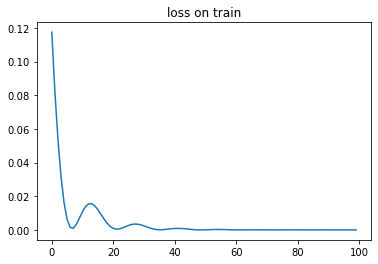

4.0145481762010604e-05


In [58]:
epochs = 100
learning_rate = 0.05
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
losses = []
model.train()
for i in range(epochs):
    epoch_loss = []
    optimizer.zero_grad()
    
    y_pred = model(torch.FloatTensor(np.vstack((lstm,rc,ffnn)).T).to('cuda'))

    single_loss = nn.MSELoss()(y_pred, test[20:2452].to('cuda'))
    single_loss.backward()
    optimizer.step()
    epoch_loss.append(single_loss.item())

        
    clear_output(True)
    losses.append(np.mean(epoch_loss))
    plt.title("loss on train")
    plt.plot(losses)
    plt.show()
    print(losses[-1])

In [59]:
(((y_pred.detach().cpu().numpy() - test[20:2452].numpy())**2).mean())**0.5

0.006336046224737522

In [61]:
model.state_dict()

OrderedDict([('0.weight', tensor([[0.4565, 0.4925, 0.0436]], device='cuda:0')),
             ('0.bias', tensor([-0.0011], device='cuda:0'))])

In [ ]:
def FHN(self, X):
        x1, y1, x2, y2 = X
        return [x1*(a-x1)*(x1-1) - y1 + k*(x2-x1),
                b1*x1 - c*y1,
                x2*(a-x2)*(x2-1) - y2 + k*(x1-x2),
                b2*x2 - c*y2
               ]